In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import os
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import keras.backend as K

# tf and keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers


import csv
import random
import pickle

In [4]:
## Load downsampled dataset

In [5]:
# Load the compressed array from disk
images_mini_norm = np.load('CNN_Xs_downsample_forvgg16.npz')['data']

In [6]:
# load the labels from disk
with open('CNN_labels_downsampled_forvgg16.csv', 'r') as file:
    reader = csv.reader(file)
    labels_mini = list(reader)[0]
    labels_mini = [int(x) for x in labels_mini]
    y_mini= np.array(labels_mini)

In [7]:
print('images_mini.shape:', images_mini_norm.shape)
print('\nnumber of labels:', len(labels_mini))
print('\nnumber of positive cancer cases:', sum(labels_mini))

images_mini.shape: (5600, 224, 224, 3)

number of labels: 5600

number of positive cancer cases: 600


In [8]:
print('New max pixel value:', images_mini_norm.max())
print('Confirm min pixel value is 0:', images_mini_norm.min())

New max pixel value: 255.0
Confirm min pixel value is 0: 0.0


In [9]:
## Visualize images

In [32]:
# Initialize lists to hold indices with and without cancer
idx_with_cancer = []
idx_without_cancer = []

# Loop through each row in the array
for row, value in enumerate(y_mini):
    if value == 1:
        # If the row contains cancer, append the index to the "with cancer" list
        idx_with_cancer.append(row)
    else:
        # If the row does not contain cancer, append the index to the "without cancer" list
        idx_without_cancer.append(row)

        # Get 8 random indices with cancer and 8 random indices without
idx_with_cancer_random = random.sample(idx_with_cancer, 8)
idx_without_cancer_random = random.sample(idx_without_cancer, 8)

Sample images with cancer, resized to 224x224


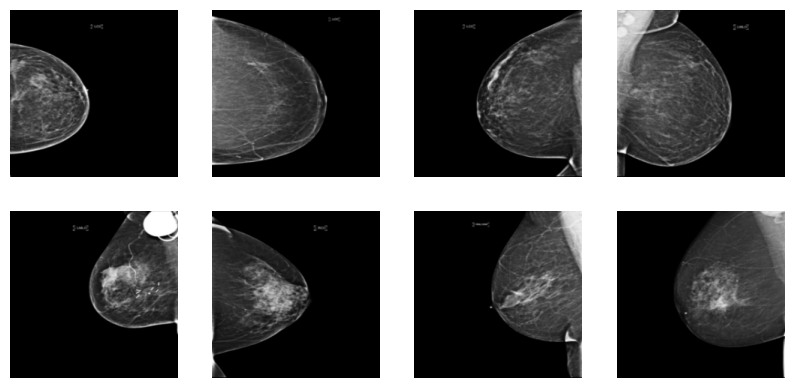

Sample images with NO cancer, resized to 224x224


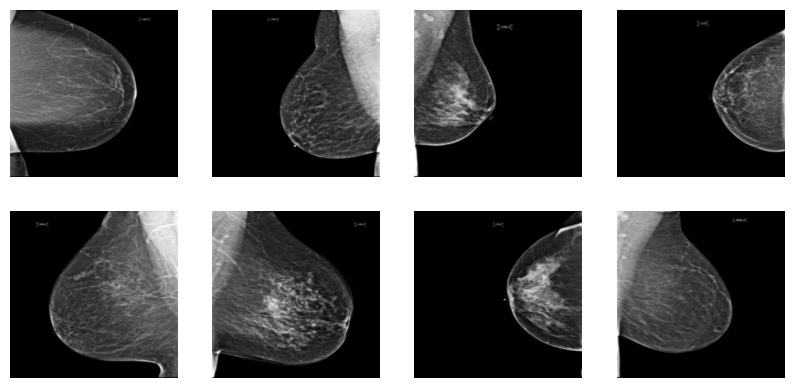

In [45]:
fig = plt.figure(figsize=(10, 10))

print('Sample images with cancer, resized to 224x224')
for i, idx in enumerate(idx_with_cancer_random):
    image = images_mini_norm[idx]
    ax = fig.add_subplot(4, 4, i+1)
    ax.imshow(array_to_img(image))
    ax.axis('off') 
plt.show()
    
fig = plt.figure(figsize=(10, 10))
print('Sample images with NO cancer, resized to 224x224')
for i, idx in enumerate(idx_without_cancer_random):
    image = images_mini_norm[idx]
    ax = fig.add_subplot(4, 4, i+1)
    ax.imshow(array_to_img(image))
    ax.axis('off') 
plt.show()




In [ ]:
tf.random.set_seed(1234)



